# Enhancing On-Time Delivery Predictions in E-Commerce: A Predictive Modeling Approach

The e-commerce business has had a remarkable development in the modern environment of globalised trade and digital connection. Due to this transition, prompt and effective product distribution has become of utmost importance. For e-commerce businesses, the ability to forecast with a high degree of accuracy whether a product will be delivered on time is becoming increasingly crucial. With the help of this predictive capability, businesses can make better judgements, streamline their logistical processes, and better satisfy client needs.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Load the dataset
df = pd.read_csv("Train.csv")

In [3]:
# Printing the head of the data
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Checking shape of the data 
df.shape

(10999, 12)

In [5]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


The "Reached.on.Time_Y.N" variable, which indicates whether or not the product arrived on schedule, serves as the target variable and label for machine learning models. It is a variable with the binary values of 1 (Not on time) and 0 (On time).

All columns, excluding the target variable, may be used as feature columns in machine learning models as potential features or predictors. There are the following listed: The following information is provided: ID, Warehouse_block, Mode of Shipping, Customer Care Calls

## 3 Data Cleaning

In [6]:
# Get summary statistics
print(df.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

In [7]:
# Deleting the unwanted colomns
df = df.drop(columns=['ID'])
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
# Check data shape and info
print("Data Shape:", df.shape)
print("Data Info:")
print(df.info())

Data Shape: (10999, 11)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB
None


In [9]:
# checking the null values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N]
Index: []


In [11]:
# Select relevant columns (features and target variable)
selected_features = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
                     'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender',
                     'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
df = df[selected_features]

# Summary statistics of key variables
summary_stats = df.describe()

## 4 EDA (Exploratory Data Analysis)

### Plot 1: Count Plot for the Product to Reaching on Time or Not

The count plot represents the count v/s reached on time or not. From this plot, we can say that the data contains more products which did not reach on time to that of which reached on time. 

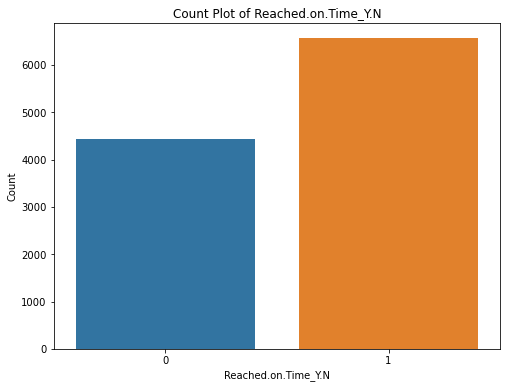

In [12]:
# Create a count plot for "Reached.on.Time_Y.N"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Reached.on.Time_Y.N')
plt.title('Count Plot of Reached.on.Time_Y.N')
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel('Count')
plt.show()

### Plot 2: Count v/s Features
The below graphs represents the count v/s all the features that are present in the data. Those are count v/s Warehouse_block, count v/s mode_of_shipement, count v/s Product_importance, count v/s Customer_care_calls, count v/s customer_rating, count v/s Cost_of_the_product, count v/s prior_purchase, count v/s discount_offered, count v/s weight_in_gms, count v/s reached.on.time_Y.N

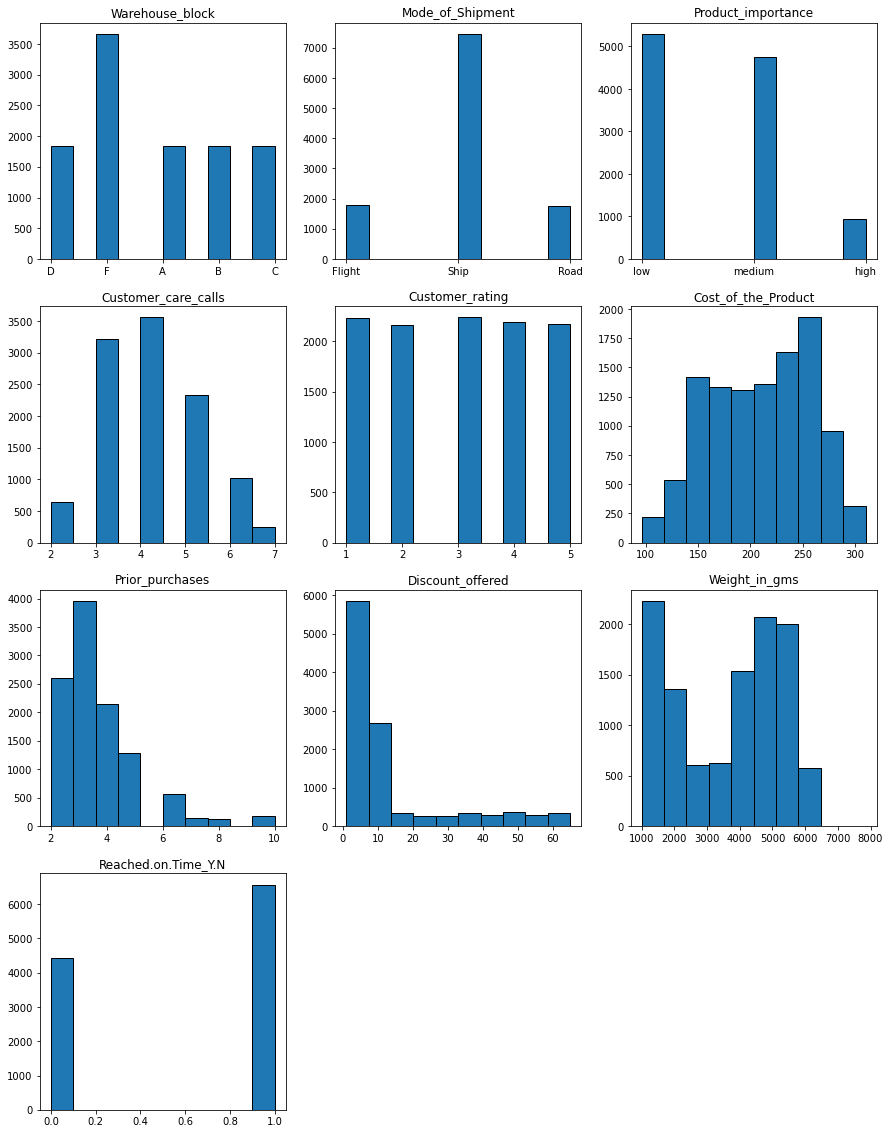

In [13]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance',  'Customer_care_calls', 'Customer_rating', 
        'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
fig = plt.figure(figsize=(15, 20))

for i in range(len(cols)):
  ax = fig.add_subplot(4, 3, i + 1)
  ax.hist(df[cols[i]],edgecolor = "black")
  ax.set_title(cols[i])
  

### Plot 3: Count plot for Warehouse Block

This plot represents the total count of the products which reached on time or not from a warehouse block. In this graph we can see that there are products in a warehouse which reached on time and there are also products from the same warehouse that did not reach on time. 

4    3666
3    1834
0    1833
1    1833
2    1833
Name: Warehouse_block, dtype: int64


<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

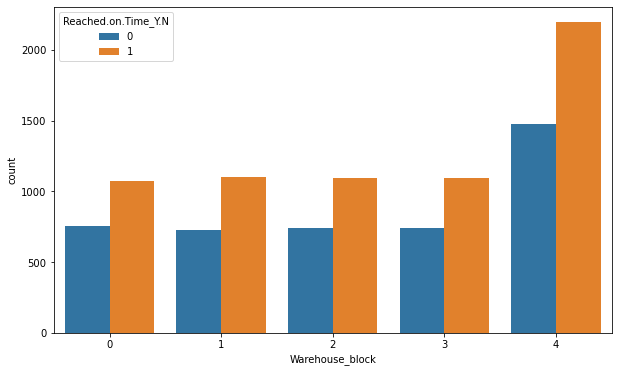

In [35]:
print(df.Warehouse_block.value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Warehouse_block'], hue=df['Reached.on.Time_Y.N'])

### Plot 4: Count Plot for Mode of Shipment
This plot represents the total count of the products which reached on time or not by a Mode of shipement. In this graph we can see that there are products by a Mode of shipement which reached on time and there are also products by the same Mode of shipement that did not reach on time.

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

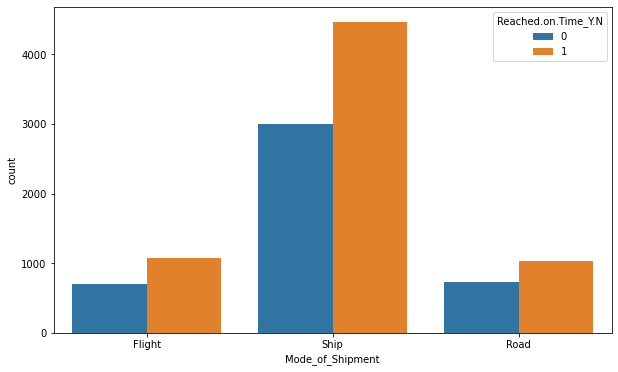

In [15]:
print(df.Mode_of_Shipment.value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Mode_of_Shipment'], hue=df['Reached.on.Time_Y.N'])

### Plot 5: Cost of product vs Discount Offered 
The scatter plot represents the cost_of_the_products v/s discount_offered based on if the product reached on time or not. From this plot we can say that the chance of the product reaching on time is higher when the discount of the product is less then 10% and the chances of that the product not to reach on time is higher when the disount on the product is higher then 10%. 

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Discount_offered'>

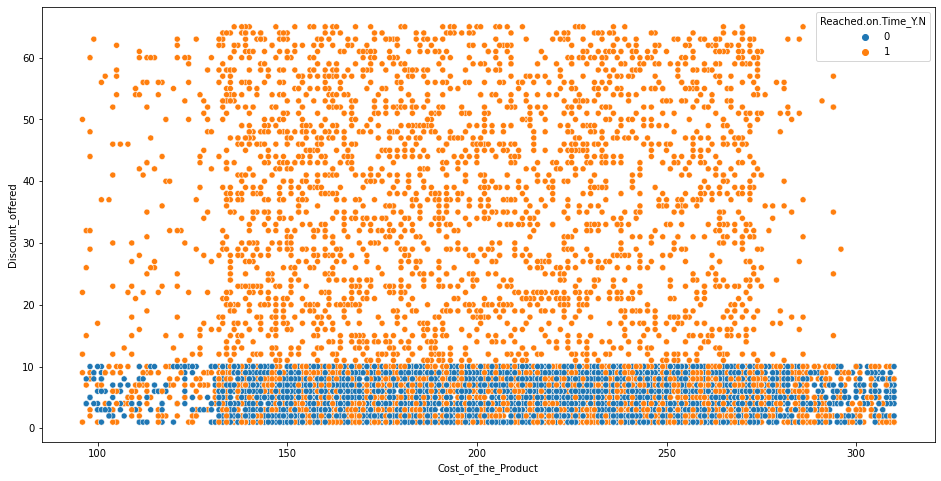

In [16]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x="Cost_of_the_Product", y="Discount_offered", hue="Reached.on.Time_Y.N")

### Plot 6: Cost of product vs Weight
The scatter plot represents the cost_of_the_products v/s Weight_in_gms based on if the product reached on time or not. From this plot we can say that the chance of the product will not reach on time is higher when the product weighs between 2000-4000 gms and the chances of that the product reaching on time is higher when the cost of the product is high with the weighing between 1000-2000 gms.

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Weight_in_gms'>

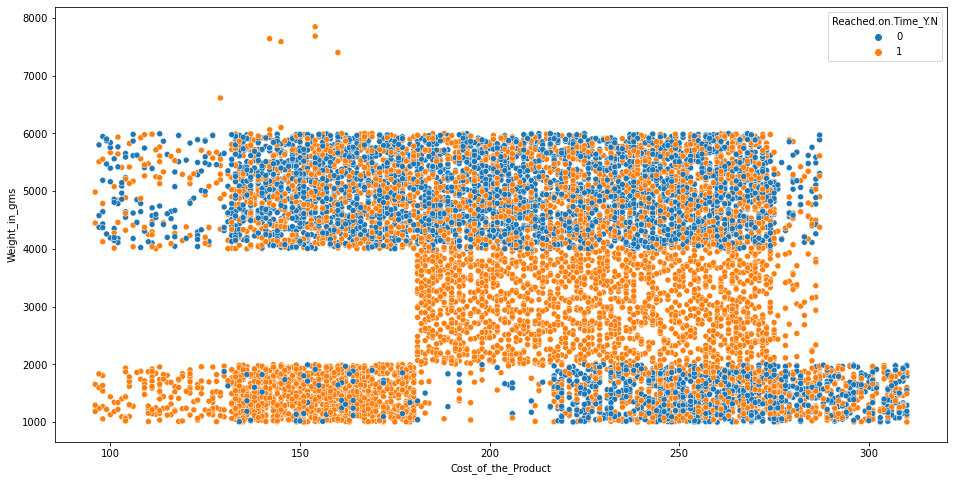

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x="Cost_of_the_Product", y="Weight_in_gms", hue="Reached.on.Time_Y.N")

### Plot 7: Customer rating vs Discount offered
The scatter plot represents the Customer_rating v/s Discount_offered based on if the product reached on time or not. From this plot we can say that the chance of the product will not reach on time when the discount higher them 10% with respect to the customer rating and the chances of that the product reaching on time is higher when the discount of the product is less then 10% we can also see that the customer rating is also high when it reach on time.

<AxesSubplot:xlabel='Customer_rating', ylabel='Discount_offered'>

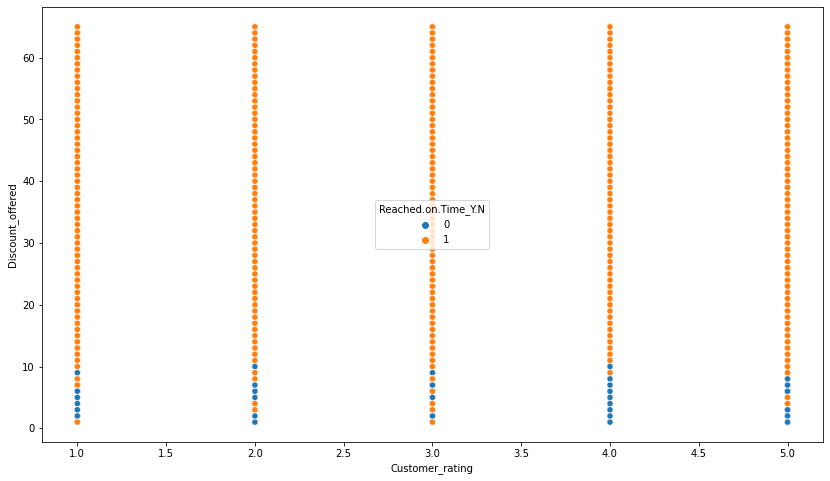

In [18]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="Customer_rating", y="Discount_offered", hue="Reached.on.Time_Y.N")

### Plot 8: Heatmap Showing the Correlation between the columns
From the heatmap, the goal is to see the correlation between the target variable and the features. We can see that the Discount_offered is highly correlated to the targer variable that is Reached.on.time_Y.N. 



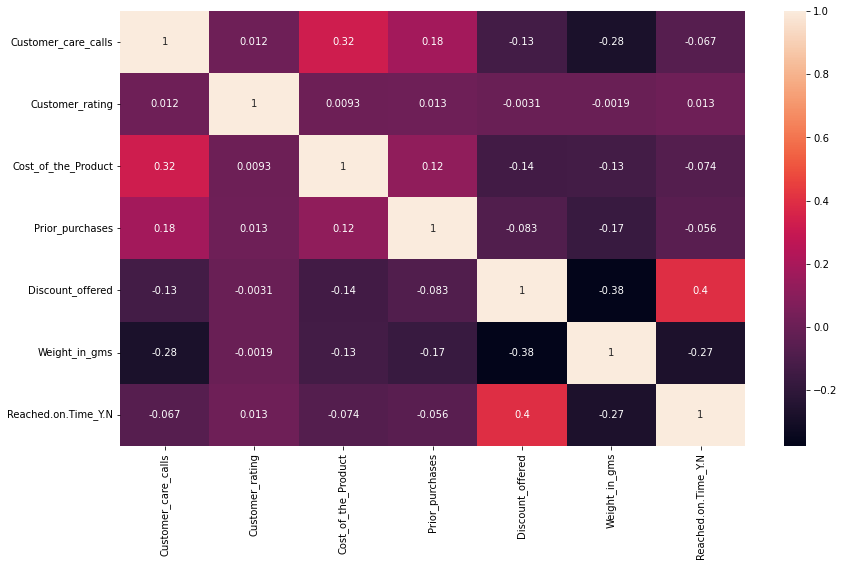

In [19]:
# Correlation matrix heatmap for numerical features
corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True)
plt.show()

### 4.2 Data Processing

In [20]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Warehouse_block'] = label_encoder.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [21]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [22]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Training

In [24]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

In [25]:
# Model 2: Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

In [26]:
# Model 3: Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test_scaled)

In [27]:
# Evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    return accuracy, confusion, report

In [28]:
# Evaluate the models
logistic_accuracy, logistic_confusion, logistic_report = evaluate_model(logistic_model, X_test_scaled, y_test)
random_forest_accuracy, random_forest_confusion, random_forest_report = evaluate_model(random_forest_model, X_test_scaled, y_test)
gradient_boosting_accuracy, gradient_boosting_confusion, gradient_boosting_report = evaluate_model(gradient_boosting_model, X_test_scaled, y_test)

In [29]:
# Print evaluation results
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Confusion Matrix:\n", logistic_confusion)
print("Logistic Regression Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.6354545454545455
Logistic Regression Confusion Matrix:
 [[493 402]
 [400 905]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



In [30]:
print("\nRandom Forest Classifier Accuracy:", random_forest_accuracy)
print("Random Forest Classifier Confusion Matrix:\n", random_forest_confusion)
print("Random Forest Classifier Classification Report:\n", random_forest_report)


Random Forest Classifier Accuracy: 0.675
Random Forest Classifier Confusion Matrix:
 [[648 247]
 [468 837]]
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.72      0.64       895
           1       0.77      0.64      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.69      0.68      0.68      2200



In [31]:
print("\nGradient Boosting Classifier Accuracy:", gradient_boosting_accuracy)
print("Gradient Boosting Classifier Confusion Matrix:\n", gradient_boosting_confusion)
print("Gradient Boosting Classifier Classification Report:\n", gradient_boosting_report)


Gradient Boosting Classifier Accuracy: 0.6863636363636364
Gradient Boosting Classifier Confusion Matrix:
 [[779 116]
 [574 731]]
Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.87      0.69       895
           1       0.86      0.56      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.72      0.69      2200
weighted avg       0.75      0.69      0.68      2200



### Plot 9: Confusion matrix plots

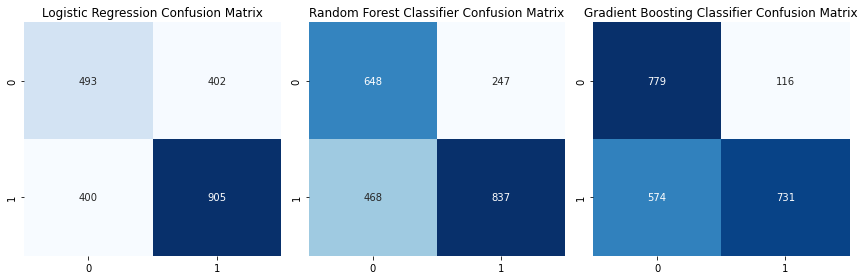

In [32]:

plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(logistic_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(132)
sns.heatmap(random_forest_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Classifier Confusion Matrix")

plt.subplot(133)
sns.heatmap(gradient_boosting_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting Classifier Confusion Matrix")

plt.tight_layout()
plt.show()

### Plot 10: Feature importance plots for Random Forest or Gradient Boosting: 

**Feature Importance in Gradient Boosting
Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.**

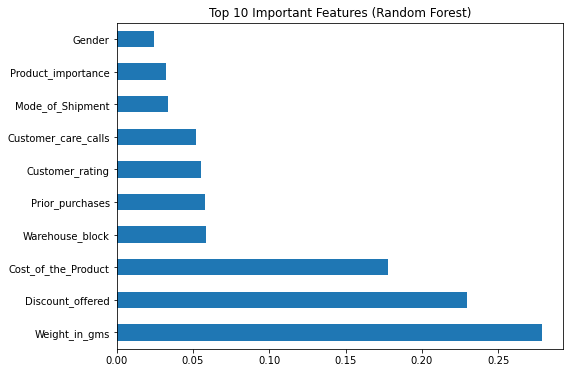

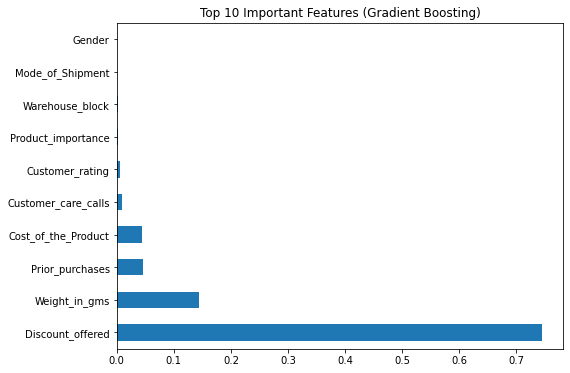

In [33]:
# Visualize feature importance scores if using tree-based models
# This step is specific to tree-based models and may not be relevant for Logistic Regression

# Feature importance for Random Forest
plt.figure(figsize=(8, 6))
feat_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

# Feature importance for Gradient Boosting
plt.figure(figsize=(8, 6))
feat_importances = pd.Series(gradient_boosting_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.show()